# MANEJO DE DATOS [PROYECTO FINAL]
*Integrantes:* 
---
>-Alanis Martínez Fernanda Yoselin

>-Camacho Guzmán Luis Angel 

>-Hernández Pérez Maximiliano

>-Luna Barroso Lucía

In [31]:
##Previamente instalamos las paqueterías pandasql y selenium junto con el chromedriver.
##Importamos las paqueterías necesarias y los respectivos módulos.
import pandas as pd
import pandasql as ps
import time 
import numpy as np
import matplotlib.pyplot as plt
import re
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [32]:
##Definimos a un auxiliar para crear dataframes.
aux = pd.DataFrame()

In [33]:
##Creamos los data frames necesarios.
aux.to_excel("df_proyectoMD.xlsx", index=False)
aux.to_excel("df_sears.xlsx", index=False)
aux.to_excel("df_liver.xlsx", index=False)
aux.to_excel("df_cya.xlsx", index=False)
aux.to_excel("df_cyasears_limpio.xlsx", index=False)

# Métodos Buscadores

In [34]:
"""
Método Buscador_Precios_Selenium_Sears:
@param: producto: Producto del que se desea tener información
Método que busca la información pedida en la página web de Sears.
@return: df_sears: DataFrame que contiene la info de la página
"""
def Buscador_Precios_Selenium_Sears(producto):
    
    ####Código nuevo
    
    s = Service("C:\webdriver3\chromedriver.exe")
    driver = webdriver.Chrome(service = s)
    url = "https://www.sears.com.mx/resultados/q="+producto+"/descuento=10"
    driver.get(url)

    
    ####### Accedemos a los elementos que contienen los datos que queremos de la página web. 
    
    productos = driver.find_elements(By.CLASS_NAME, "cardProduct")

    ### Accedemos a los nombres de los productos.

    lista_nombres = list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements(By.CLASS_NAME, "h4")[0].text)
        except:
            lista_nombres.append(np.nan)


    ### Accedemos a los precios base y promos de los productos. 

    lista_precios = list()
    lista_promos = list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements(By.CLASS_NAME, "textUnderline")[0].text)
            lista_promos.append(productos[i].find_elements(By.CLASS_NAME, "precio1")[0].text)
        except:
            lista_promos.append(np.nan)

    
    ### Creamos el DataFrame.

    df_sears = pd.DataFrame({"Nombre": lista_nombres,"Precio_Promocional":lista_promos,"Precio_Normal":lista_precios})    
    df_sears["Autoservicio"]= "Sears"
    df_sears["Marca"]= producto
    df_sears["Fecha"]= time.strftime("%d/%m/%y")

    ### Reorganizamos las columnas del DataFrame.
    df_sears = df_sears[["Fecha","Autoservicio","Marca","Nombre","Precio_Promocional","Precio_Normal"]]
    df_sears = df_sears.reset_index(drop = True)

    ### Cargamos el Data Frame con el .xlsx

    datos_webscraper = pd.read_excel("df_sears.xlsx")
    datos_webscraper = pd.concat([datos_webscraper,df_sears], axis = 0)
    datos_webscraper.to_excel("df_sears.xlsx", index = False)

    driver.quit()

    return df_sears

In [35]:
"""
Método Buscador_Precios_Selenium_Liverpool:
@param: producto: Producto del que se desea tener información
Método que busca la información pedida en la página web de Liverpool.
@return: df_liver: DataFrame que contiene la info de la página
"""
def Buscador_Precios_Selenium_Liverpool(producto):
    
    #### Código nuevo
    
    s = Service("C:\webdriver3\chromedriver.exe")
    driver = webdriver.Chrome(service = s)
    url = "https://www.liverpool.com.mx/tienda?s="+producto
    driver.get(url)

    
    ####### Accedemos a los elementos que contienen los datos que queremos de la página web. 
    
    productos = driver.find_elements(By.CLASS_NAME, "m-plp-card-container")

    ### Accedemos a los nombres de los productos.

    lista_nombres = list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements(By.TAG_NAME, "h5")[0].text)
        except:
            lista_nombres.append(np.nan)


    ### Accedemos a los precios base y promos de los productos. 

    lista_precios = list()
    lista_promos = list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements(By.CLASS_NAME, "a-card-discount")[0].text)
            lista_promos.append(productos[i].find_elements(By.CLASS_NAME, "a-card-price")[0].text)
        except:
            lista_promos.append(np.nan)

    
    ### Creamos el DataFrame.

    df_liver = pd.DataFrame({"Nombre": lista_nombres,"Precio1":lista_promos,"Precio2":lista_precios})    
    df_liver["Autoservicio"]= "Liverpool"
    df_liver["Marca"]= producto
    df_liver["Fecha"]= time.strftime("%d/%m/%y")

    ### Reorganizamos las columnas.
    df_liver = df_liver[["Fecha","Autoservicio","Marca","Nombre","Precio1","Precio2"]]
    df_liver = df_liver.reset_index(drop = True)

    ### Cargamos el Data Frame con el .xlsx

    datos_webscraper = pd.read_excel("df_liver.xlsx")
    datos_webscraper = pd.concat([datos_webscraper,df_liver], axis = 0)
    datos_webscraper.to_excel("df_liver.xlsx", index = False)

    driver.quit()

    return df_liver

In [36]:
"""
Método Buscador_Precios_Selenium_Ca:
@param: producto: Producto del que se desea tener información
Método que busca la información pedida en la página web de C&A.
@return: df_cya: DataFrame que contiene la info de la página
"""
def Buscador_Precios_Selenium_Ca(producto):
    
    ####Código nuevo
    
    s = Service("C:\webdriver3\chromedriver.exe")
    driver = webdriver.Chrome(service = s)
    url = "https://www.cyamoda.com/"+producto
    driver.get(url)

    
    ####### Accedemos a los elementos que contienen los datos que queremos de la pagina web 
    
    productos = driver.find_elements(By.CLASS_NAME, "ui-search-layout__item")

    ### accedemos a los nombres de los productos

    lista_nombres = list()
    for i in range(len(productos)):
        try:
            lista_nombres.append(productos[i].find_elements(By.TAG_NAME, "h2")[0].text)
        except:
            lista_nombres.append(np.nan)


    ### accedemos a los precios base y promo de los productos 

    lista_precios = list()
    lista_promos = list()
    for i in range(len(productos)):
        try:
            lista_precios.append(productos[i].find_elements(By.CLASS_NAME, "price-tag-fraction")[0].text)
            lista_promos.append(productos[i].find_elements(By.CLASS_NAME, "price-tag-text-sr-only")[1].text)
        except:
            lista_promos.append(np.nan)

    
    ### Creamos el DataFrame
    df_cya = pd.DataFrame({"Nombre": lista_nombres,"Precio_Promocional":lista_promos,"Precio_Normal":lista_precios})    
    df_cya["Autoservicio"]= "C&A"
    df_cya["Marca"]= producto
    df_cya["Fecha"]= time.strftime("%d/%m/%y")

    ## Reorganizamos el dataFrame
    df_cya = df_cya[["Fecha","Autoservicio","Marca","Nombre","Precio_Promocional","Precio_Normal"]]
    df_cya = df_cya.reset_index(drop = True)

    ###Cargamos el Data Frame con el xlsx
    datos_webscraper = pd.read_excel("df_cya.xlsx")
    datos_webscraper = pd.concat([datos_webscraper,df_cya], axis = 0)
    datos_webscraper.to_excel("df_cya.xlsx", index = False)

    driver.quit()

    return df_cya

In [37]:
### Aplicamos los tres métodos para la lista de productos a buscar.
for productos in ["jeans","playera","vestidos","botas"]:
    Buscador_Precios_Selenium_Liverpool(productos)
    Buscador_Precios_Selenium_Sears(productos)
    Buscador_Precios_Selenium_Ca(productos)

In [38]:
"""
Método precios_floats_CaSears:
@param: datos: DataFrame del que se desea cambiar sus precios a floats.
Método que transforma las columnas de precios a floats.
@return: datos: El mismo DataFrame con los precios como floats.
"""
def precios_floats_CaSears(datos):
     
    #### Eliminamos el signo de pesos "$" de ambas columnas.
    
    for i in range(len(datos["Precio_Promocional"])):
        try:
            datos["Precio_Promocional"].iloc[i]=datos["Precio_Promocional"].iloc[i].strip("$")
        except:
            pass
        
    for i in range(len(datos["Precio_Normal"])):
        try:
            datos["Precio_Normal"].iloc[i]=datos["Precio_Normal"].iloc[i].strip("$")
        except:
            pass
        
    
    ### Quitamos la separación de comas para miles, las palabras "pesos" y MXN.
    
    datos["Precio_Promocional"]=datos["Precio_Promocional"].replace(",","",regex=True)
    datos["Precio_Normal"]=datos["Precio_Normal"].replace(",","",regex=True)
    datos["Precio_Promocional"]=datos["Precio_Promocional"].replace("pesos","",regex=True)
    datos["Precio_Promocional"]=datos["Precio_Promocional"].replace("MXN","",regex=True)
    datos["Precio_Normal"]=datos["Precio_Normal"].replace("MXN","",regex=True)
   
    ### Convertimos los precios a numéricos.    
    
    datos["Precio_Normal"]= pd.to_numeric(datos['Precio_Normal'], errors='coerce')
    datos["Precio_Promocional"]= pd.to_numeric(datos['Precio_Promocional'], errors='coerce')
        
    ### Creamos los archivos excel con los datos de C&A & Sears.
    datos_webscraper = pd.read_excel("df_cyasears_limpio.xlsx")
    datos_webscraper = pd.concat([datos_webscraper,datos], axis = 0)
    datos_webscraper.to_excel("df_cyasears_limpio.xlsx", index = False)
    
    return datos

In [39]:
"""
Método chido_Liver:
@param: datos: DataFrame del que se quiere hacer la comparación de precios.
Método que compara los precios en columnas para poner los descuentos y precios en la columna correcta.
@return: datos: El mismo DataFrame con los precios reordenamos dependiendo su cantidad.
"""
def chido_Liver(datos):
    
    ### Comparamos precios entre las columnas de precios promocionales y precios normales.
    pair=[("Precio1","Precio2")]
    datos2=pd.DataFrame()
    for l,r in pair:
        datos2[l]=datos[l].where(datos.Precio1>datos.Precio2,datos[r])
        datos2[r]=datos[r].where(datos.Precio1>datos.Precio2,datos[l])

    ### Renombramos las columnas obtenidas a las deseadas.
    datos3= datos2.rename(columns = {"Precio1":"Precio_Normal", "Precio2":"Precio_Promocional"})

    ### Creamos el archivo excel y adjuntamos el DataFrame.
    datos = datos.join(datos3)
    datos = datos[["Fecha","Autoservicio","Marca","Nombre","Precio_Promocional","Precio_Normal"]]
    datos.to_excel("df_liver_limpio.xlsx",index=False)
    
    return datos

"""
Método precios_floats_Liverpool:
@param: datos: DataFrame del que se desea cambiar sus precios a floats.
Método que transforma las columnas de precios a floats.
@return: datos: El mismo DataFrame con los precios como floats.
"""
def precios_floats_Liverpool(datos):
     
    #### Eliminamos el signo de pesos de ambas columnas.
    
    for i in range(len(datos["Precio1"])):
        try:
            datos["Precio1"].iloc[i]=datos["Precio1"].iloc[i].strip("$")
        except:
            pass
        
    for i in range(len(datos["Precio2"])):
        try:
            datos["Precio2"].iloc[i]=datos["Precio2"].iloc[i].strip("$")
        except:
            pass
        
    
    ### Quitamos la separacion de las comas para miles.
    
    datos["Precio1"]=datos["Precio1"].replace(",","",regex=True)
    datos["Precio2"]=datos["Precio2"].replace(",","",regex=True)
    
    ### Eliminamos los últimos dos dígitos correspondientes a los centavos.
    
    datos["Precio2"]= datos["Precio2"].astype(str).str[:-2]
    datos["Precio1"]= datos["Precio1"].astype(str).str[:-2]
    
    ### Convertimos los precios a numéricos.    
    datos["Precio2"]= pd.to_numeric(datos['Precio2'], errors='coerce')
    datos["Precio1"]= pd.to_numeric(datos['Precio1'], errors='coerce')
    
    datos = chido_Liver(datos)
    
    return datos

In [40]:
###Definimos los DataFrames con la información obtenida de los buscadores.
df_cya=pd.read_excel("df_cya.xlsx")
df_liver=pd.read_excel("df_liver.xlsx")
df_sears=pd.read_excel("df_sears.xlsx")

In [41]:
### Se aplican los métodos de precios a los dataframes.
precios_floats_CaSears(df_cya)
precios_floats_Liverpool(df_liver)
precios_floats_CaSears(df_sears)

C:\Users\max15\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Fecha,Autoservicio,Marca,Nombre,Precio_Promocional,Precio_Normal
0,26/01/22,Sears,jeans,Jeans 710 Super Skinny Levis para Dama,569,1199
1,26/01/22,Sears,jeans,Jeans Corte Straigh Sw Polo Club para Caballero,199,599
2,26/01/22,Sears,jeans,Jeans 310 Shaping Super Skinny Levi&rsquo;S&re...,199,599
3,26/01/22,Sears,jeans,Jeans Straigh Fit Polo Club para Caballero,669,1199
4,26/01/22,Sears,jeans,Jeans Casual Levi's Skinny Taper Jeans Modelo ...,699,1399
...,...,...,...,...,...,...
395,26/01/22,Sears,botas,Bota Alta Lisa con Aplicaciones en el Tacón Ne...,979,1399
396,26/01/22,Sears,botas,Botín con Agujeta para Niño Blasito,179,599
397,26/01/22,Sears,botas,Bootie Negro con Tacón Baerchi,759,1899
398,26/01/22,Sears,botas,Bootie Gris con Tacón Baerchi,759,1899


In [42]:
### Declaramos los nuevos DataFrames con los precios como floats.
df_cyasears=pd.read_excel("df_cyasears_limpio.xlsx")
df_liver=pd.read_excel("df_liver_limpio.xlsx")

In [43]:
### Concatenamos los DataFrames en uno solo, debido a que Liverpool tuvo un método diferente.
data=[df_cyasears , df_liver]
df_final = pd.concat(data)
df_final.to_excel("df_proyectoMD.xlsx", index=False)

In [44]:
###Se imprime el dataFrame con las tres tiendas.
df_final

,Fecha,Autoservicio,Marca,Nombre,Precio_Promocional,Precio_Normal
0,26/01/22,C&A,jeans,Pantalón De Mezclilla Slim De Hombre C&a (3023...,NaN,399.0
1,26/01/22,C&A,jeans,Pantalón De Mezclilla Fit Carrot De Hombre C&a...,NaN,399.0
2,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Mujer C&a (302...,NaN,399.0
3,26/01/22,C&A,jeans,Pantalón De Mezclilla Slim De Hombre C&a (3023...,NaN,399.0
4,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Hombre C&a (30...,NaN,399.0
...,...,...,...,...,...,...
219,26/01/22,Liverpool,botas,Bota Clarks piel,1255.0,1569.0
220,26/01/22,Liverpool,botas,Bota Caterpillar piel,2169.0,3099.0
221,26/01/22,Liverpool,botas,Bota Paruno piel,1539.0,2199.0
222,26/01/22,Liverpool,botas,Bota Quirelli piel,1189.0,1699.0


# Consultas

In [45]:
### Consulta de productos que son jeans.
ps.sqldf("select  * from df_final where (marca= 'jeans')")

,Fecha,Autoservicio,Marca,Nombre,Precio_Promocional,Precio_Normal
0,26/01/22,C&A,jeans,Pantalón De Mezclilla Slim De Hombre C&a (3023...,NaN,399.0
1,26/01/22,C&A,jeans,Pantalón De Mezclilla Fit Carrot De Hombre C&a...,NaN,399.0
2,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Mujer C&a (302...,NaN,399.0
3,26/01/22,C&A,jeans,Pantalón De Mezclilla Slim De Hombre C&a (3023...,NaN,399.0
4,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Hombre C&a (30...,NaN,399.0
...,...,...,...,...,...,...
199,26/01/22,Liverpool,jeans,Jeans skinny Calvin Klein Jeans j20j217056-1a4...,NaN,2299.0
200,26/01/22,Liverpool,jeans,Jeans slim Gap stone,NaN,1299.0
201,26/01/22,Liverpool,jeans,Jeans super skinny Aéropostale lavado destruid...,699.0,999.0
202,26/01/22,Liverpool,jeans,Jeans slim Banana Republic,NaN,1079.0


In [46]:
### Consulta de productos con precio normal mayor a $3000.
ps.sqldf("select  * from df_final where (Precio_Normal>3000)")

,Fecha,Autoservicio,Marca,Nombre,Precio_Promocional,Precio_Normal
0,26/01/22,Sears,jeans,Jeans Carsen Seven Ata145236A para Caballero,1079.0,3599.0
1,26/01/22,Sears,jeans,Jeans Austyn Seven para Caballero,989.0,3299.0
2,26/01/22,Sears,jeans,Jeans Austyn Seven Ata04630Aivct para Caballero,989.0,3299.0
3,26/01/22,Sears,botas,Bota Casual Tommy Negro,3149.0,4499.0
4,26/01/22,Sears,botas,Bota Color Café Caterpillar,3439.0,4299.0
5,26/01/22,Sears,botas,Bota Casual Tommy Café,3149.0,4499.0
6,26/01/22,Sears,botas,Bota Sneaker Caterpillar,1979.0,3299.0
7,26/01/22,Sears,botas,Botín Café Cat para Dama,2309.0,3299.0
8,26/01/22,Sears,botas,Botín Piel Café para Caballero Cat Modelo P724678,1799.0,3599.0
9,26/01/22,Sears,botas,Bota de Piel Café para Caballero Caterpillar M...,1979.0,3299.0


In [47]:
### Consulta de las prendas que sean de Mezclilla.
ps.sqldf("select * from df_final where (nombre like '%mezclilla%')")

,Fecha,Autoservicio,Marca,Nombre,Precio_Promocional,Precio_Normal
0,26/01/22,C&A,jeans,Pantalón De Mezclilla Slim De Hombre C&a (3023...,NaN,399.0
1,26/01/22,C&A,jeans,Pantalón De Mezclilla Fit Carrot De Hombre C&a...,NaN,399.0
2,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Mujer C&a (302...,NaN,399.0
3,26/01/22,C&A,jeans,Pantalón De Mezclilla Slim De Hombre C&a (3023...,NaN,399.0
4,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Hombre C&a (30...,NaN,399.0
5,26/01/22,C&A,jeans,Pantalón De Mezclilla Push Up De Mujer C&a (30...,NaN,399.0
6,26/01/22,C&A,jeans,Pantalón De Mezclilla Mom Fit De Mujer C&a (30...,NaN,499.0
7,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Hombre C&a (30...,349.0,499.0
8,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Hombre C&a (30...,349.0,499.0
9,26/01/22,C&A,jeans,Pantalón De Mezclilla Push Up De Mujer C&a (30...,NaN,399.0


In [48]:
### Consulta de productos que sí tienen descuento.
ps.sqldf("select  * from df_final where (Precio_Promocional!='NaN')")

,Fecha,Autoservicio,Marca,Nombre,Precio_Promocional,Precio_Normal
0,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Hombre C&a (30...,349.0,499.0
1,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny De Hombre C&a (30...,349.0,499.0
2,26/01/22,C&A,jeans,Pantalón De Mezclilla Skinny Tapered De Hombre...,298.0,499.0
3,26/01/22,C&A,jeans,Pantalón Cropped De Hombre C&a (3029656),449.0,499.0
4,26/01/22,C&A,jeans,Pantalón Cropped De Hombre C&a (3029657),449.0,499.0
...,...,...,...,...,...,...
594,26/01/22,Liverpool,botas,Bota Clarks piel,1255.0,1569.0
595,26/01/22,Liverpool,botas,Bota Caterpillar piel,2169.0,3099.0
596,26/01/22,Liverpool,botas,Bota Paruno piel,1539.0,2199.0
597,26/01/22,Liverpool,botas,Bota Quirelli piel,1189.0,1699.0


In [49]:
### Consulta de cuántos productos son jeans.
ps.sqldf("select count  (*) from df_final where (marca= 'jeans')")

,count (*)
0,204


In [50]:
### Consulta de precio promedio por cada producto.
ps.sqldf("select marca,avg(Precio_Normal) as Precio_Promedio from df_final group by marca ")

,Marca,Precio_Promedio
0,botas,1910.284848
1,jeans,829.156863
2,playera,349.049020
3,vestidos,693.563725


In [51]:
### Consulta de precio promedio de descuentos por tienda.
ps.sqldf("select autoservicio,avg(Precio_Promocional) as Precio_Promedio from df_final group by autoservicio ")

,Autoservicio,Precio_Promedio
0,C&A,173.924051
1,Liverpool,1084.408333
2,Sears,532.545000


In [52]:
### Consulta del precio promedio por tienda.
ps.sqldf("select autoservicio,avg(Precio_Normal) as Precio_Promedio from df_final group by autoservicio ")

,Autoservicio,Precio_Promedio
0,C&A,326.474026
1,Liverpool,1290.434978
2,Sears,897.485000


In [53]:
### Consulta de precio promedio por producto y por marca.
ps.sqldf("select autoservicio, marca, avg(Precio_Normal) as Precio_Promedio from df_final group by autoservicio, marca  ")

,Autoservicio,Marca,Precio_Promedio
0,C&A,botas,449.000000
1,C&A,jeans,433.333333
2,C&A,playera,137.333333
3,C&A,vestidos,383.229167
4,Liverpool,botas,2332.854545
5,Liverpool,jeans,1006.857143
6,Liverpool,playera,507.750000
7,Liverpool,vestidos,1332.892857
8,Sears,botas,1824.000000
9,Sears,jeans,919.640000


In [54]:
### Consulta de precio más alto por producto y tienda.
ps.sqldf("select MAX (Precio_Normal) as Precio_Mas_Alto, autoservicio, marca from df_final where marca in ('jeans', 'playera', 'vestidos', 'botas') group by marca, autoservicio ")

,Precio_Mas_Alto,Autoservicio,Marca
0,799.0,C&A,botas
1,4999.0,Liverpool,botas
2,4499.0,Sears,botas
3,599.0,C&A,jeans
4,2299.0,Liverpool,jeans
5,3599.0,Sears,jeans
6,249.0,C&A,playera
7,829.0,Liverpool,playera
8,1099.0,Sears,playera
9,699.0,C&A,vestidos


# Gráficos

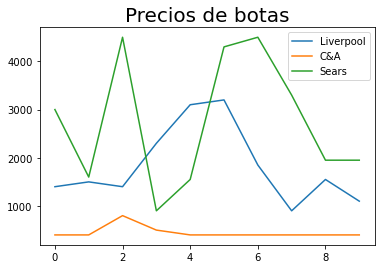

In [55]:
"""
Gráfico que refleja el precio de los primeros 10 productos correspondientes a botas por tienda.
"""
df3= pd.DataFrame(ps.sqldf("select * from df_final where(marca='botas' and autoservicio='Liverpool')limit 10"))
df4= pd.DataFrame(ps.sqldf("select * from df_final where(marca='botas' and autoservicio='C&A')limit 10"))
df5= pd.DataFrame(ps.sqldf("select * from df_final where(marca='botas' and autoservicio='Sears')limit 10"))
fig= plt.plot(df3['Precio_Normal'], label= "Liverpool")
fig= plt.plot(df4['Precio_Normal'], label= "C&A")
fig= plt.plot(df5['Precio_Normal'], label= "Sears")
fig= plt.title("Precios de botas", fontsize=20)
plt.legend()
plt.show()

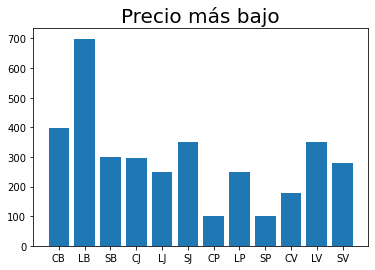

In [56]:
"""
Gráfico que revela el precio del producto menos costoso por tienda y producto.
"""
tabla1 = ps.sqldf("select MIN (Precio_Normal) as Precio_Mas_Bajo, autoservicio, marca from df_final where marca in ('jeans', 'playera', 'vestidos', 'botas') group by marca, autoservicio ")
df2 = pd.DataFrame(tabla1)
fig,ax = plt.subplots()
plt.bar(range(12), tabla1["Precio_Mas_Bajo"], align='center')
plt.title("Precio más bajo", fontsize= 20)
names=["CB","LB","SB","CJ","LJ","SJ","CP","LP","SP","CV","LV","SV"]
ax.set_xticks(range(12))
ax.set_xticklabels(names)
plt.show()

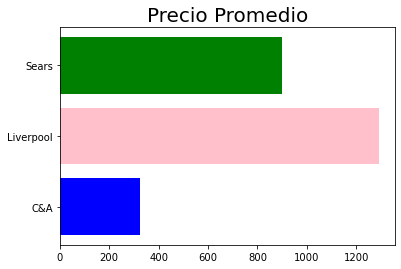

In [57]:
"""
Gráfico que refleja el precio promedio de sus productos por tienda.
"""
tabla2 = ps.sqldf("select autoservicio,avg(Precio_Normal) as Precio_Promedio from df_final group by autoservicio ")
df1 = pd.DataFrame(tabla2)
fig,ax = plt.subplots()
plt.barh(range(3), tabla2["Precio_Promedio"], color=["blue","pink","green"], align='center')
plt.title("Precio Promedio", fontsize= 20)
names=["C&A", "Liverpool", "Sears"]
ax.set_yticks(range(3))
ax.set_yticklabels(names)
plt.show()

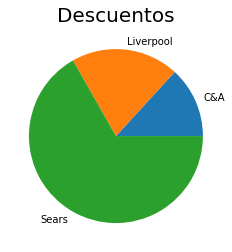

In [58]:
"""
Gráfico que refleja el porcentaje de los descuentos que corresponde a cada tienda.
"""
tb = ps.sqldf("select count(Precio_Normal) as Descuentos, autoservicio from df_final where (Precio_Promocional!='NaN') group by autoservicio")
dat = pd.DataFrame(tb)
fig, ax=plt.subplots()
x=["C&A", "Liverpool", "Sears"]
ax.pie(dat["Descuentos"], labels=x)
plt.title("Descuentos", fontsize=20)
plt.show()